In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from random import randint
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Data Loading
toronto_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine-Learning-Approach-Towards-Crime-Prediction/Toronto_2014to2019.csv")
df=toronto_data

In [ ]:
#Data Processing
col_list = ['occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek',\
            'occurrencehour','MCI','Division','Hood_ID','premisetype']
toronto_data=toronto_data[col_list]
toronto_data=toronto_data.dropna(subset=['occurrenceyear'])
crime_var=pd.factorize(toronto_data["MCI"])
toronto_data['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]
toronto_data['premisetype'] = pd.factorize(toronto_data['premisetype'])[0]
toronto_data['occurrencedayofweek'] = pd.factorize(toronto_data['occurrencedayofweek'])[0]
toronto_data['Division'] = pd.factorize(toronto_data['Division'])[0]
toronto_data['occurrencemonth'] = pd.factorize(toronto_data['occurrencemonth'])[0]

In [ ]:
#Splitting Data
X=toronto_data.drop(['MCI'],axis=1).values
y=toronto_data['MCI'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.816401e+06,5.434587e+06,701,GO-20141756319,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Commercial,1430,100,Assault,2014,March,24,83,Monday,3,2014.0,March,24.0,83.0,Monday,1,Assault,D42,132,Malvern (132),-79.199081,43.800281,1
1,-8.837252e+06,5.413357e+06,901,GO-20143006885,2014/09/27 00:00:00+00,2014/09/29 00:00:00+00,Other,2120,200,B&E,2014,September,29,272,Monday,10,2014.0,September,27.0,270.0,Saturday,16,Break and Enter,D52,76,Bay Street Corridor (76),-79.386383,43.662472,2
2,-8.862433e+06,5.422276e+06,702,GO-20141756802,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Commercial,2120,200,B&E,2014,March,24,83,Monday,7,2014.0,March,24.0,83.0,Monday,6,Break and Enter,D23,1,West Humber-Clairville (1),-79.612595,43.720406,3
3,-8.833104e+06,5.431887e+06,703,GO-20141760570,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Apartment,2120,200,B&E,2014,March,24,83,Monday,23,2014.0,March,24.0,83.0,Monday,15,Break and Enter,D33,47,Don Valley Village (47),-79.349121,43.782772,4
4,-8.845311e+06,5.413667e+06,902,GO-20142004859,2014/05/03 00:00:00+00,2014/05/03 00:00:00+00,Commercial,1610,210,Robbery - Business,2014,May,3,123,Saturday,2,2014.0,May,3.0,123.0,Saturday,2,Robbery,D11,90,Junction Area (90),-79.458778,43.664490,5


In [ ]:
def result(classifier_random):
    y_pred = classifier_random.best_estimator_.predict(X_test)
    print("Training score:"+str(accuracy_score(y_train,classifier_random.best_estimator_.predict(X_train))))
    print("Testing score:"+str(accuracy_score(y_test,y_pred)))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

In [2]:
def cf_mat(y_test,y_pred):
  plt.figure(figsize=(10,10))
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix, annot=True)
  plt.xticks([0.5,1.5,2.5,3.5,4.5], [ 'Assault', 'Break and Enter', 'Robbery', 'Theft Over', 'Auto Theft '],va='center')
  plt.yticks([0.5,1.5,2.5,3.5,4.5], [ 'Assault', 'Break and Enter', 'Robbery', 'Theft Over', 'Auto Theft '],va='center')
  plt.title('Confusion Matrix')

#RandomForest

In [ ]:
#RandomForest
rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train.values.ravel())
# y_pred = rf_classifier.predict(X_test)

#Hyper parameters
params_rf={
    'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 3, num = 10)],
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)],
    'max_features': [int(x) for x in np.linspace(start = 1, stop = 8, num = 8)],
    'bootstrap': [True, False],
    'criterion': ['gini','entropy'],
}

rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = params_rf,  cv = 5)
rf_random.fit(X_train,y_train)

In [ ]:
#Results
result(rf_random)
cf_mat(y_test,y_pred)

#RandomForest Plotting

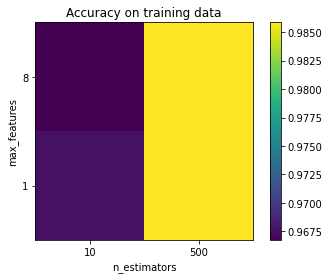

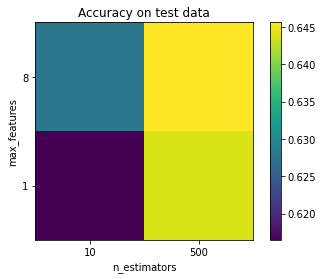

In [ ]:
import sklearn
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 2)]
max_features = [int(x) for x in np.linspace(start = 1, stop = 8, num = 2)]
accuracies = np.empty((len(max_features), len(n_estimators), 2))

for i, max_f in enumerate(max_features):
  for j, n_estimator in enumerate(n_estimators):
    clf_Rand = sklearn.ensemble.RandomForestClassifier(random_state=0, max_features=max_f, n_estimators=n_estimator)
    clf_Rand.fit(X_train, y_train)
    accuracies[i,j,0] = sklearn.metrics.accuracy_score(y_train, clf_Rand.predict(X_train))
    accuracies[i,j,1] = sklearn.metrics.accuracy_score(y_test, clf_Rand.predict(X_test))
    
# Your plotting code here. Aim for 8-10 lines.
for i, name in enumerate(['training', 'test']):
    plt.figure()
    plt.imshow(accuracies[:,:,i], origin='lower')
    plt.colorbar();
    plt.xlabel('n_estimators')
    plt.ylabel('max_features')
    plt.xticks(range(len(n_estimators)), labels=n_estimators)
    plt.yticks(range(len(max_features)), labels=max_features)
    plt.title("Accuracy on %s data" % name)

#KNN

In [ ]:
#knn
knn_classifier=KNeighborsClassifier()
# knn_classifier.fit(X_train,y_train.values.ravel())
# y_pred=knn_classifier.predict(X_test)

#Hyperparameters
params_knn={
    'n_neighbors': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

knn_random = RandomizedSearchCV(estimator = knn_classifier, param_distributions = params_knn, n_iter = 50, cv = 5, 
                               verbose=2, random_state=0, n_jobs = -1,return_train_score=True)
knn_random.fit(X_train,y_train)



In [ ]:
#Results
result(knn_random)
cf_mat(y_test,y_pred)

#KNeighborsClassifier Plotting




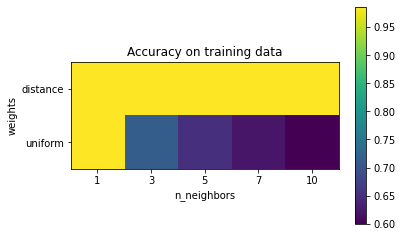

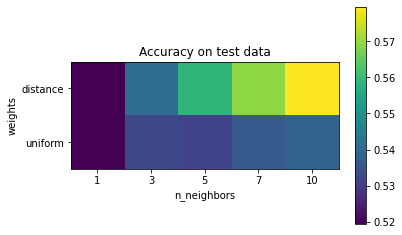

In [ ]:
import sklearn
n_neighbors= [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]
weights = ['uniform', 'distance']
accuracies = np.empty((len(weights), len(n_neighbors), 2))

for i, weight in enumerate(weights):
  for j, n_neighbor in enumerate(n_neighbors):
    clf_knn = KNeighborsClassifier(n_neighbors=n_neighbor,weights=weight)
    clf_knn.fit(X_train, y_train)
    accuracies[i,j,0] = sklearn.metrics.accuracy_score(y_train, clf_knn.predict(X_train))
    accuracies[i,j,1] = sklearn.metrics.accuracy_score(y_test, clf_knn.predict(X_test))
    
# Your plotting code here. Aim for 8-10 lines.
for i, name in enumerate(['training', 'test']):
    plt.figure()
    plt.imshow(accuracies[:,:,i], origin='lower')
    plt.colorbar();
    plt.xlabel('n_neighbors')
    plt.ylabel('weights')
    plt.xticks(range(len(n_neighbors)), labels=n_neighbors)
    plt.yticks(range(len(weights)), labels=weights)
    plt.title("Accuracy on %s data" % name)

#AdaBoostClassifier

In [ ]:
#AdaBoost
ab_classifier = AdaBoostClassifier()
# ab_classifier.fit(X_train, y_train.values.ravel())
# y_pred = ab_classifier.predict(X_test)

#Hyperparameters
params_ab={
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)],
    'learning_rate': scipy.stats.reciprocal(0.01, 1.0),
    'algorithm': ['SAMME.R', 'SAMME'],
    'random_state': [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
}

ab_random = RandomizedSearchCV(estimator = ab_classifier, param_distributions = params_ab, n_iter = 50, cv = 3, 
                               verbose=2, random_state=0, n_jobs = -1)
ab_random.fit(X_train,y_train);

In [ ]:
#Results
result(ab_random)
cf_mat(y_test,y_pred)

#AdaBoostClassifier Plotting

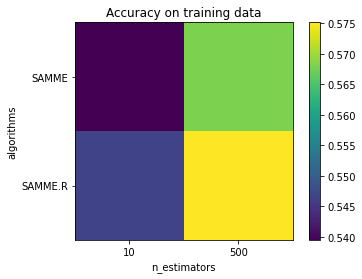

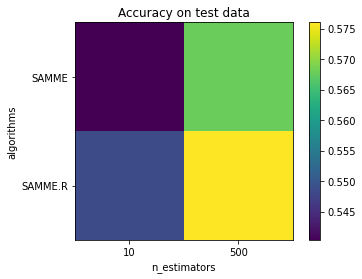

In [ ]:
import sklearn
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 2)]
algorithms =  ['SAMME.R', 'SAMME']
accuracies = np.empty((len(algorithms), len(n_estimators), 2))

for i, algorithm in enumerate(algorithms):
  for j, n_estimator in enumerate(n_estimators):
    clf_adaboost = AdaBoostClassifier(n_estimators=n_estimator,algorithm=algorithm)
    clf_adaboost.fit(X_train, y_train)
    accuracies[i,j,0] = sklearn.metrics.accuracy_score(y_train, clf_adaboost.predict(X_train))
    accuracies[i,j,1] = sklearn.metrics.accuracy_score(y_test, clf_adaboost.predict(X_test))
    
# Your plotting code here. Aim for 8-10 lines.
for i, name in enumerate(['training', 'test']):
    plt.figure()
    plt.imshow(accuracies[:,:,i], origin='lower')
    plt.colorbar();
    plt.xlabel('n_estimators')
    plt.ylabel('algorithms')
    plt.xticks(range(len(n_estimators)), labels=n_estimators)
    plt.yticks(range(len(algorithms)), labels=algorithms)
    plt.title("Accuracy on %s data" % name)